In [105]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [106]:
pixel_size_cal = 0.503 # obtained from attractor calibration data February2020, but cross checked during Wilson itself
attractor_0 = 226 # 0 position of attractor as extrapolated from image analysis of z=50 and z=27. Obtained from Wilson attractor screening.

In [141]:
# load the image files
bead_date =20200518
bead_number = 2
dataset = "/Shaking/Shaking374/"
FOI = "Shaking374_7"
filename = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures_0/" + FOI
data = load_npy_files(path=filename+"*",max_files=10000)

/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_0.npy 0
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_1.npy 1
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_2.npy 2
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_3.npy 3
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_4.npy 4
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_5.npy 5
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_6.npy 6
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_7.npy 7
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_8.npy 8
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_9.npy 9
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_10.npy 10
/data/new_trap/20200518/Bead2//Shaking/Shaking374/Pictures_0/Shaking374_7_11.npy 11
/data/new_tr

In [142]:
def from_shadow_image_to_height(image,threshold,area_low_limits=[670,730],area_widths=[40,70],flb=430,fub=530,area_max=3000,width_max=5,plot=False):
    thresh = threshold_image(image.copy(),threshold,256)
    img = thresh.transpose()
    z1 = np.mean(img[area_low_limits[0]:area_low_limits[0]+area_widths[0]],axis=0)
    z2 = np.mean(img[area_low_limits[1]:area_low_limits[1]+area_widths[1]],axis=0)
    fit_img = z1-z2
    m = gaussian_fit_shadow_height(fit_img,low_y_lim=flb,up_y_lim=fub,upper_area=area_max,up_lim_width=width_max,img_type="Diff_Projection",)
    
    if(plot==True):
        plt.plot(fit_img)
        plt.plot(range(1024),gaussian(range(1024),params=[m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]]),label="fit")
        plt.xlim(m.values["mean"]-100,m.values["mean"]+100)
    # height =  pixel_to_height(m.values["mean"],calibration=calibration)        
    return m.values["mean"],m # in pixels



In [144]:
height = [] # get the height using the shadow method
for i in tqdm(range(len(data))):
    mean, m = from_shadow_image_to_height(data[i],150,area_low_limits=[650,730],area_widths=[45,70],plot=False)
    height.append(pixel_to_height(mean,calibration=True,pix_size_from_calib=pixel_size_cal))
    print(mean)
    plt.show()



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 5/1000 [00:00<00:23, 43.05it/s]

  1%|          | 9/1000 [00:00<00:23, 41.34it/s]

471.52147139993446
473.115350338531
472.5361358981493
472.33387044625226
472.1432895908405
471.67734353790104
511.4043181539456
470.67658693174553
470.57023248477964




  1%|▏         | 13/1000 [00:00<00:24, 39.62it/s]

  2%|▏         | 17/1000 [00:00<00:26, 37.61it/s]

523.5570013878307
469.42603239998533
469.1700070247086
468.96595994200305
468.65541487165603
468.6394376844161
468.34974893572485
468.1787848019238




  2%|▏         | 21/1000 [00:00<00:26, 36.57it/s]

  3%|▎         | 26/1000 [00:00<00:25, 38.52it/s]

467.82336206922787
468.1085670185827
467.69805874110403
467.4990515479061
467.1945376766914
466.8318735961746
466.70024725168986
466.6902342432033
466.71479036041217




  3%|▎         | 31/1000 [00:00<00:23, 40.84it/s]

  4%|▎         | 37/1000 [00:00<00:22, 43.51it/s]

466.71323112605256
466.6556695888493
466.64859370683246
466.6119197713002
466.1700410175348
466.18149901629795
465.7712401670464
465.83730558318695
465.7598362315124
465.72295955275524
465.67591715202553




  4%|▍         | 43/1000 [00:01<00:20, 46.27it/s]



465.6071147349657
465.5531666826413
465.6111847757984
465.5548087812407
465.1070607209084
464.87174404614564
464.7899958711399
464.79188135098616
464.8010404821024
464.73244953134474
464.72735187634345
464.752414293669
464.3924221810631


  5%|▌         | 50/1000 [00:01<00:19, 49.92it/s]

  6%|▌         | 56/1000 [00:01<00:18, 52.07it/s]

  6%|▌         | 62/1000 [00:01<00:17, 52.69it/s]

464.3792088774736
464.5721565101053
464.67939373512786
464.5160260990666
464.6219492172943
464.60246402391596
464.2407419692893
464.48864011477053
463.8269029026491
463.84966311002114
463.8141264840524
463.80004491088647




  7%|▋         | 68/1000 [00:01<00:17, 51.95it/s]

463.80873675784585
463.7990925994369
463.75050006138434
463.76058445174334
463.78454111883923
463.68791789737315
463.73993773328874
463.80101551865846
463.7737113645552
463.81527705433405
463.73866252105404




  7%|▋         | 74/1000 [00:01<00:18, 51.08it/s]

  8%|▊         | 80/1000 [00:01<00:17, 51.23it/s]

463.7891778322007
463.7455443718678
463.7197263486125
463.6966146435817
463.7659820574508
463.77386151800926
463.77723449932006
463.6725969857098
463.733474784203
463.67857093800325
463.69083318039986




  9%|▊         | 86/1000 [00:01<00:17, 50.83it/s]

  9%|▉         | 92/1000 [00:01<00:17, 50.98it/s]

463.58401720444556
463.68847434581437
463.6401402434633
463.8045719408682
463.77340274964354
463.6823428467868
463.6964763579439
463.7398115361619
463.78629207981385
463.68932438995995
463.7432781902123




 10%|▉         | 98/1000 [00:02<00:17, 50.58it/s]

 10%|█         | 104/1000 [00:02<00:17, 50.21it/s]

463.72051735741974
463.7170733842313
463.6700435315398
463.6760114491209
463.6347793511251
463.6863607735921
463.68819273403574
463.67291959415076
463.71065850036416
463.7386070860456




 11%|█         | 110/1000 [00:02<00:17, 50.07it/s]

 12%|█▏        | 116/1000 [00:02<00:17, 49.99it/s]

463.7347412678903
463.6388633942476
463.59135072905354
463.70201604964916
463.67100976726925
463.65005401299726
463.6522216458719
463.60871597788577
463.649808229228
463.6593948601031
463.63391843701135




 12%|█▏        | 122/1000 [00:02<00:17, 49.74it/s]

 13%|█▎        | 127/1000 [00:02<00:17, 49.35it/s]

463.61218795812795
463.63844620237563
463.38112180861765
463.72772336028675
463.4969822483446
463.3245252197777
463.6568970567039
463.6172297592407
463.7353702986335
463.71168286991974
463.61581003000356




 13%|█▎        | 132/1000 [00:02<00:17, 48.85it/s]

 14%|█▎        | 137/1000 [00:02<00:17, 48.89it/s]

463.7740373486889
463.72208569235517
463.6948734843117
463.6355110332581
463.65434287475074
463.685590981482
463.6950738966475
463.40287845233206
463.6036153261665
463.68793117716893




 14%|█▍        | 142/1000 [00:02<00:17, 48.70it/s]

 15%|█▍        | 147/1000 [00:03<00:17, 48.32it/s]

463.72040888308817
463.691384023672
463.6968456872405
463.6024666998471
463.67447372803804
463.66212479031435
463.71735473742916
463.72907206355893
463.7605200373917
463.3477603153866




 15%|█▌        | 152/1000 [00:03<00:17, 48.07it/s]

 16%|█▌        | 157/1000 [00:03<00:17, 48.42it/s]

463.6453577540675
463.7171415476446
463.62988657965786
462.8678815757859
463.3511823142145
463.5720765603597
463.634910596302
463.6378355262357
463.63111060581855
463.6495546399333




 16%|█▌        | 162/1000 [00:03<00:17, 48.54it/s]

 17%|█▋        | 167/1000 [00:03<00:17, 48.68it/s]

463.61226875933653
463.6058898081093
463.5873308722534
463.6402502786021
463.68631811872893
463.61395678851767
463.6894179302402
463.6638346987219
463.60264948663894
463.58715826283844




 17%|█▋        | 172/1000 [00:03<00:17, 48.64it/s]

 18%|█▊        | 177/1000 [00:03<00:16, 48.67it/s]

463.3002225907576
463.6879450789857
463.2430174082528
463.64896125672266
463.5903704944757
463.29637766804876
463.62631639218216
463.62770575884446
463.5880569634937
463.718665029742




 18%|█▊        | 182/1000 [00:03<00:17, 48.01it/s]

 19%|█▊        | 187/1000 [00:03<00:16, 48.18it/s]

463.6407420828516
463.5470828240174
463.60372288593896
463.7956650115873
463.74207195962805
463.67322026241976
463.662865568478
463.61943413270154
463.5840010488756
463.42749666021564




 19%|█▉        | 192/1000 [00:03<00:16, 48.53it/s]

 20%|█▉        | 198/1000 [00:04<00:16, 49.00it/s]

463.6442031355788
463.67855237092226
463.66517185090424
463.7318015034364
463.7012312054263
463.8063608627841
463.783153364604
463.39774895124503
463.6503725404419
463.698429699728
463.75138750076565




 20%|██        | 203/1000 [00:04<00:16, 48.84it/s]

 21%|██        | 208/1000 [00:04<00:16, 48.87it/s]

463.8209604880332
463.637363449573
463.7487849074974
463.6702895883393
463.73612464543845
463.63036443465205
463.53417362684013
463.27742849529744
463.65340929210987
463.6732988009518




 21%|██▏       | 213/1000 [00:04<00:16, 48.83it/s]

 22%|██▏       | 218/1000 [00:04<00:16, 48.41it/s]

463.3981745491449
463.6934760661109
463.36087378716536
463.7312205997355
463.7284609220144
463.63261945981935
463.70807683658205
463.18160563203577
463.0951124706776
463.5696398337892




 22%|██▏       | 223/1000 [00:04<00:15, 48.75it/s]

 23%|██▎       | 228/1000 [00:04<00:15, 48.33it/s]

463.1769507157353
463.54178281910356
463.6771659225878
463.65030996481454
463.7139974460701
463.67663190136653
463.41012429410614
463.6972609478718
463.6712727901288
463.60333002975716




 23%|██▎       | 233/1000 [00:04<00:15, 48.28it/s]

 24%|██▍       | 238/1000 [00:04<00:15, 48.28it/s]

463.70480688680976
463.64336384536136
463.60264459384024
463.72301979589105
463.30043176264786
463.7688148751958
463.5821153774581
463.58610982577386
463.3226324293694
463.6284387731164




 24%|██▍       | 243/1000 [00:05<00:15, 48.06it/s]

 25%|██▍       | 248/1000 [00:05<00:15, 48.19it/s]

463.6058283166524
463.675810581573
463.61368343464756
463.56709805814523
463.68222152453853
463.6563952343028
463.735187454304
463.6253488183553
463.5923222390977
463.7389900571647
463.62227342172605




 25%|██▌       | 253/1000 [00:05<00:15, 47.78it/s]

 26%|██▌       | 259/1000 [00:05<00:15, 48.54it/s]

463.60902648367266
463.62156050501466
463.33110648478566
463.58275300014293
463.61707828492104
463.71604598616955
463.66011818639157
463.5894800957207
463.7164311295755
463.6103078611465




 26%|██▋       | 264/1000 [00:05<00:15, 47.92it/s]

 27%|██▋       | 269/1000 [00:05<00:15, 48.26it/s]

463.700582881191
463.60967044905624
463.22172895220814
463.5289732401135
463.2274176867603
463.6418882318517
463.3532990071818
463.64713426103594
463.59285633434223
463.59157264181056




 27%|██▋       | 274/1000 [00:05<00:14, 48.41it/s]

 28%|██▊       | 279/1000 [00:05<00:14, 48.75it/s]

463.69496598067167
463.6732203464891
463.7999368652352
463.72405489706387
463.7005231264933
463.75065797310015
463.80539347388583
463.6656347431183
463.716076866062
463.6750361705144




 28%|██▊       | 284/1000 [00:05<00:14, 48.39it/s]

 29%|██▉       | 289/1000 [00:05<00:14, 48.58it/s]

463.678471233413
463.67335659855496
463.6394644738826
463.6121884168959
463.6993061654063
463.63015760987713
463.61764484962407
463.642342974718
463.61982039047035
463.60280231233884




 30%|██▉       | 295/1000 [00:06<00:14, 49.14it/s]

 30%|███       | 300/1000 [00:06<00:14, 48.92it/s]

463.6293415629695
463.6700312838348
463.70239904033866
463.6478163225404
463.67363998647494
463.63734155298886
463.5604636892141
463.66619385809514
463.28408350169633
463.6516059673792
463.6172323324852




 30%|███       | 305/1000 [00:06<00:14, 48.98it/s]

 31%|███       | 310/1000 [00:06<00:14, 48.97it/s]

463.6770561302756
463.7367630913018
463.7778224546502
463.696476639847
463.77877299738617
463.7247510053932
463.7307474450572
463.74406491066236
463.81707492582797
463.73412015600667
463.7434745246059




 32%|███▏      | 316/1000 [00:06<00:13, 49.72it/s]

 32%|███▏      | 321/1000 [00:06<00:13, 49.25it/s]

463.8663317148436
463.82317249934863
463.6442924076165
463.6811829724802
463.7547025180517
463.64423641204576
463.6602305479234
463.6621455111645
463.6355524504936
463.6743506865797




 33%|███▎      | 326/1000 [00:06<00:13, 49.14it/s]

 33%|███▎      | 331/1000 [00:06<00:13, 48.72it/s]

463.7321886446513
463.60204397782985
463.68676324895
463.7773455297766
463.7765742960546
463.72350943967746
463.6472633357579
463.61669415902065
463.80044195405355
463.72408494078803




 34%|███▎      | 336/1000 [00:06<00:13, 48.79it/s]

 34%|███▍      | 341/1000 [00:07<00:13, 48.48it/s]

463.6758763874075
463.6181498767845
463.7185271336521
463.6916208432816
463.7328704867025
463.64316907642467
463.59717463309687
463.67179013761705
463.75596114448206
463.68526650821934




 35%|███▍      | 346/1000 [00:07<00:13, 48.70it/s]

 35%|███▌      | 351/1000 [00:07<00:13, 48.19it/s]

463.70127452438714
463.65562875335183
463.6175637142129
463.63293809537976
463.6924438241332
463.54901796506334
463.64442554534867
463.4280535367551
463.61769640942504
463.6861225039796




 36%|███▌      | 356/1000 [00:07<00:13, 47.67it/s]

 36%|███▌      | 361/1000 [00:07<00:13, 47.86it/s]

463.63169801328627
463.6199846867966
463.67916573134585
463.57873201524
463.3225589193638
463.6240714853672
463.2708372121354
463.67351395317314
463.7165375891532
463.6574651200015




 37%|███▋      | 366/1000 [00:07<00:13, 47.80it/s]

 37%|███▋      | 371/1000 [00:07<00:13, 48.31it/s]

463.60143887593273
463.55688398331137
463.6801764981556
463.5913451269547
463.628387912757
463.6979538623387
463.6968777019861
463.37088168803547
463.7214798418228
463.5302946865303




 38%|███▊      | 376/1000 [00:07<00:12, 48.62it/s]

 38%|███▊      | 382/1000 [00:07<00:12, 49.12it/s]

463.63952735987766
463.68330771160817
463.6454321154915
463.7407993689598
463.57737839350483
463.7133735226188
463.7175509305523
463.6722231521643
463.6949391470119
463.71283700655994
463.71954418380795




 39%|███▊      | 387/1000 [00:08<00:12, 48.95it/s]

 39%|███▉      | 393/1000 [00:08<00:12, 49.41it/s]

463.3665859867024
463.2192942866634
463.5944102276849
463.69544579003536
463.6373079552093
463.64621462675984
463.69988960355516
463.72463404991976
463.7014880338291
463.66992106415603
463.6025706704907




 40%|███▉      | 398/1000 [00:08<00:12, 48.73it/s]

 40%|████      | 403/1000 [00:08<00:12, 48.49it/s]

463.5422586696226
463.7175641582303
463.5769697091932
463.63237296736236
463.2093811461838
463.5811422333235
463.22863696067037
463.5584192074412
463.3294312947248
463.5508755829286




 41%|████      | 408/1000 [00:08<00:12, 48.93it/s]

 41%|████▏     | 413/1000 [00:08<00:11, 48.97it/s]

463.31217716606096
463.5417579600031
463.6693398376903
463.63741592003055
463.62431747047435
463.6051835779483
463.5334711461269
463.6912362707213
463.64778194013826
463.6341501624921




 42%|████▏     | 418/1000 [00:08<00:12, 48.25it/s]

 42%|████▏     | 423/1000 [00:08<00:11, 48.64it/s]

463.4079573251898
463.646603141589
463.67981572148415
463.38149040111574
463.62670079592533
463.58454770436566
463.56724640830123
463.5674550372395
463.34038667881464
463.5962831089098




 43%|████▎     | 428/1000 [00:08<00:11, 48.86it/s]

 43%|████▎     | 433/1000 [00:08<00:11, 48.90it/s]

463.6167885911682
463.30921023707623
463.4868765609383
463.6382059017848
463.652968010884
463.60624886596725
463.5922607819482
463.59296198889206
463.61863163781135
463.65487836397534




 44%|████▍     | 438/1000 [00:09<00:11, 48.73it/s]

 44%|████▍     | 443/1000 [00:09<00:11, 47.96it/s]

463.5861731313819
463.5180920020609
463.5821256772108
463.6600145299018
463.68411157875846
463.63212412295934
463.3636729932356
463.6166799101284
463.64468702797575
463.6620415568493




 45%|████▍     | 448/1000 [00:09<00:11, 47.39it/s]

 45%|████▌     | 453/1000 [00:09<00:11, 47.49it/s]

463.6287296769352
463.36831503095226
463.65970515107944
463.6601705966463
463.8192726813118
463.65534188078857
463.61599292375774
463.7047629160552
463.58955479957626
463.59065787655345




 46%|████▌     | 458/1000 [00:09<00:11, 47.96it/s]

 46%|████▋     | 463/1000 [00:09<00:11, 48.33it/s]

463.69966292367735
463.56246272928826
463.52732721326345
463.6576242359479
463.3300186991958
463.6336889461866
463.611498184746
463.18617960841914
463.6404147538234
463.3261420352285




 47%|████▋     | 468/1000 [00:09<00:10, 48.42it/s]

 47%|████▋     | 473/1000 [00:09<00:10, 48.59it/s]

463.28906112240725
463.6450499409757
463.56363396101744
463.4202563105579
463.59494825658277
463.21328305122717
463.61746738851474
463.6507718361902
463.6920371304283
463.55079777625696




 48%|████▊     | 478/1000 [00:09<00:10, 48.38it/s]

 48%|████▊     | 483/1000 [00:09<00:10, 48.85it/s]

463.6923018196678
463.5306185428092
463.59818702540707
463.68726805468964
463.67055273777225
463.7216787338484
463.70543493773647
463.65725537231475
463.6861548319048
463.68979125797847




 49%|████▉     | 488/1000 [00:10<00:10, 48.93it/s]

 49%|████▉     | 493/1000 [00:10<00:10, 48.94it/s]

463.66773785193493
463.44459629141085
463.66857709676464
463.72946570239435
463.37938469056746
463.6994392224825
463.669338905047
463.71314863244424
463.3202637107084
463.56299135610067




 50%|████▉     | 498/1000 [00:10<00:10, 48.92it/s]

 50%|█████     | 503/1000 [00:10<00:10, 48.76it/s]

463.6471154781991
463.64356607569675
463.66795479876527
463.70459367367476
463.62501706054184
463.6397488154444
463.3912871627933
463.6994329195315
463.2609494081881
463.67659425116153




 51%|█████     | 508/1000 [00:10<00:10, 48.17it/s]

 51%|█████▏    | 513/1000 [00:10<00:10, 48.19it/s]

463.5350809607286
463.24520469369355
462.93210721479295
463.1952075016102
463.605618174982
463.26298380323624
463.27219847602953
463.46298142333126
463.2205286313352
463.528805973156




 52%|█████▏    | 518/1000 [00:10<00:09, 48.25it/s]

 52%|█████▏    | 523/1000 [00:10<00:09, 48.35it/s]

463.27187511171724
463.3422439426856
463.7277329712192
463.67832953049265
463.5398526813128
463.529511227792
463.20463984578936
463.2914185590979
463.6405891922541
463.2934820613014




 53%|█████▎    | 528/1000 [00:10<00:09, 47.87it/s]

 53%|█████▎    | 533/1000 [00:11<00:09, 48.08it/s]

463.26989727918505
463.54386353062336
463.18333446091094
463.52241504525955
463.3022055052441
463.66902934354215
463.2356303219766
463.42700876093176
463.6481455179392
463.6556946600871




 54%|█████▍    | 538/1000 [00:11<00:09, 47.25it/s]

 54%|█████▍    | 543/1000 [00:11<00:09, 47.43it/s]

463.59737755990477
463.3499957070635
462.8404321926064
463.23643735406944
463.64973186073314
463.2477949348922
463.280502010953
463.6443457045543
463.59285784212636
463.30757230274634




 55%|█████▍    | 548/1000 [00:11<00:09, 47.61it/s]

 55%|█████▌    | 553/1000 [00:11<00:09, 48.13it/s]

463.2921355353094
463.6424273204134
463.26667320502816
463.3422486897119
463.6387734504034
463.5605502366907
463.5856418202634
463.541648401875
463.5697833528936
463.54773193762964




 56%|█████▌    | 558/1000 [00:11<00:09, 48.14it/s]

 56%|█████▋    | 563/1000 [00:11<00:09, 47.92it/s]

463.6572928530578
463.2191927560679
463.66451524320047
463.6437587040926
463.1903610221086
463.6334901745241
463.32883351674764
463.6354107376065
463.6605091091759
463.7562276480489




 57%|█████▋    | 568/1000 [00:11<00:08, 48.09it/s]

 57%|█████▋    | 573/1000 [00:11<00:08, 47.76it/s]

463.73029565284816
463.64180510583145
463.64367134990175
463.62383680111736
463.56703950941807
463.69291910216475
463.716116636028
463.5533550669416
463.2615421376734
463.62537450164297




 58%|█████▊    | 579/1000 [00:11<00:08, 48.55it/s]

 58%|█████▊    | 584/1000 [00:12<00:08, 48.20it/s]

463.6296629218279
463.66755686960244
463.6499983765472
463.62486920980325
463.4552609720759
463.70471112079696
463.66827581624347
463.63613041138234
463.69464882924194
463.58962961447617
463.711303573751




 59%|█████▉    | 589/1000 [00:12<00:08, 48.35it/s]

 59%|█████▉    | 594/1000 [00:12<00:08, 48.74it/s]

463.6689291406669
463.75957965535116
463.38344612240326
463.2620161310987
463.57572051693205
463.63576790511155
463.4623476851408
463.3572579150802
463.6794574606449
463.67187594576194




 60%|█████▉    | 599/1000 [00:12<00:08, 48.20it/s]

 60%|██████    | 604/1000 [00:12<00:08, 48.55it/s]

463.6371992212506
463.65573949726684
463.6460330373365
463.6586783126203
463.72528136588875
463.76702031065173
463.7600942821812
463.6911055041177
463.657466100181
463.7631226080027




 61%|██████    | 609/1000 [00:12<00:08, 48.50it/s]

 61%|██████▏   | 614/1000 [00:12<00:07, 48.84it/s]

463.72889150377284
463.6615026356864
463.660117572911
463.6563697528239
463.5632117606213
463.64012738727865
463.61896853775994
463.6985523128689
463.6173792021656
463.68052516837884




 62%|██████▏   | 619/1000 [00:12<00:07, 48.58it/s]

 62%|██████▏   | 624/1000 [00:12<00:07, 48.27it/s]

463.60163195257434
463.7101490328255
463.7131760560068
463.7492300396674
463.68983899720797
463.5938035906493
463.6327720031661
463.7394643806023
463.71073708009624
463.6118823064055




 63%|██████▎   | 629/1000 [00:13<00:07, 47.93it/s]

 63%|██████▎   | 634/1000 [00:13<00:07, 48.27it/s]

463.39757298603234
463.66303794665833
463.59378619509437
463.65990913378766
463.6505296887877
463.2806549876026
463.7391298069621
463.6339684535813
463.65221429985866
463.5812167824122




 64%|██████▍   | 639/1000 [00:13<00:07, 48.37it/s]

 64%|██████▍   | 644/1000 [00:13<00:07, 48.25it/s]

463.6443363289317
463.2710854330029
463.5947928847364
463.5696377332572
463.6006439585019
463.2310443763015
463.58823951763026
463.52136029178826
463.56626046507586
463.2556726486991




 65%|██████▍   | 649/1000 [00:13<00:07, 47.76it/s]

 65%|██████▌   | 654/1000 [00:13<00:07, 47.64it/s]

463.3455105976708
463.39114465488404
463.53856180249716
463.24658150376695
463.5661924346508
463.63147806240323
462.87344897466284
463.50720742736877
463.5164388605551
463.66140512749126




 66%|██████▌   | 659/1000 [00:13<00:07, 47.63it/s]

 66%|██████▋   | 664/1000 [00:13<00:06, 48.12it/s]

463.65212434872734
463.6593949021581
463.69423108636045
463.6569112326796
463.4288621242347
463.6009096142618
463.66973806730044
463.702313047302
463.8238460137602
463.6879969651998
463.66612893188784




 67%|██████▋   | 670/1000 [00:13<00:06, 48.80it/s]

 68%|██████▊   | 675/1000 [00:13<00:06, 48.70it/s]

463.5840037250204
463.6341109216256
463.3731647921222
463.64232808000946
463.6234556960725
463.74444100853043
463.6494543852573
463.73040238796
463.68783802238727
463.6435413359295




 68%|██████▊   | 681/1000 [00:14<00:06, 49.31it/s]

463.3586268016659
463.6822204274315
463.54709870536607
463.2671217976508
463.6388200172796
463.62915368433073
463.7151300502719
463.3513924708531
463.57524866045895
463.55821082455816




 69%|██████▊   | 686/1000 [00:14<00:06, 48.63it/s]

 69%|██████▉   | 691/1000 [00:14<00:06, 48.14it/s]

463.68395885273026
463.57224293698573
463.5016634065337
463.65289982960746
463.6857809164163
463.55604514691163
463.2410053044034
463.3168488929563
463.31331669552105
462.8589884280647




 70%|██████▉   | 696/1000 [00:14<00:06, 46.88it/s]

 70%|███████   | 701/1000 [00:14<00:06, 47.02it/s]

463.53780618598057
463.63140381322546
463.2519769160441
463.28804030125303
463.6181484160204
463.31553250360395
463.205768560377
463.31803091923183
463.6239300431724
463.31555470768757




 71%|███████   | 706/1000 [00:14<00:06, 46.89it/s]

 71%|███████   | 711/1000 [00:14<00:06, 47.21it/s]

463.37195597608013
463.60345212122604
463.687610430291
463.557816847356
463.3717312191292
463.2564352057152
463.38560516347155
463.29619344743816
463.62307203885285
463.602948367483




 72%|███████▏  | 716/1000 [00:14<00:05, 47.52it/s]

 72%|███████▏  | 721/1000 [00:14<00:05, 47.78it/s]

463.6007601606909
463.67929321913067
463.35991227562687
463.5765533342639
463.61585660737074
463.59791841064384
463.2093264017032
463.54622051474666
463.18394027192755
463.24215472069784




 73%|███████▎  | 726/1000 [00:15<00:05, 47.30it/s]

 73%|███████▎  | 731/1000 [00:15<00:05, 47.18it/s]

463.2540533348172
463.280291207181
463.2610664151106
463.57416082228855
463.20895652176654
462.78157105101934
463.20552122874705
463.2658712503911
463.2689082514544
463.7228192010416




 74%|███████▎  | 736/1000 [00:15<00:05, 47.51it/s]

 74%|███████▍  | 741/1000 [00:15<00:05, 47.69it/s]

463.6664954321938
463.6018758391672
463.3270419823116
463.51179062082736
463.1480875274726
463.24303739728623
463.6043763018691
463.3126502269603
463.5550250554111
463.2915193314779




 75%|███████▍  | 746/1000 [00:15<00:05, 47.54it/s]

 75%|███████▌  | 751/1000 [00:15<00:05, 48.13it/s]

463.21616261350437
463.5944104342243
463.61855073203895
463.6154146313471
463.6583863446676
463.57180287256574
462.9431644635026
463.49679047321297
463.55804449578
463.25732738809756




 76%|███████▌  | 756/1000 [00:15<00:05, 47.45it/s]

 76%|███████▌  | 761/1000 [00:15<00:04, 47.91it/s]

463.62172749056083
463.61841812401167
463.74691051124233
463.22012062944145
463.5262221245468
463.49797071914026
463.56490235404425
463.51490059639667
463.20704780718125
463.5862352377704




 77%|███████▋  | 766/1000 [00:15<00:04, 48.09it/s]

 77%|███████▋  | 771/1000 [00:15<00:04, 47.88it/s]

463.40114825045987
463.3424395646297
463.5375059175478
463.3168602398358
463.5923058679639
463.351830926751
463.5127411984319
463.6231093565837
463.6696344173123
463.37666300980027




 78%|███████▊  | 777/1000 [00:16<00:04, 48.74it/s]

 78%|███████▊  | 783/1000 [00:16<00:04, 49.29it/s]

463.6442378340172
463.5274712421792
463.6312612124965
463.6748559081137
463.59176615269257
463.6745744397802
463.61229066874154
463.5535611575088
463.68418117854714
463.3650671569815
463.6470908397355




 79%|███████▉  | 788/1000 [00:16<00:04, 49.49it/s]

 79%|███████▉  | 793/1000 [00:16<00:04, 49.43it/s]

463.6387477015459
463.6876441386401
463.68037298609715
463.63257557248005
463.3189965588257
463.659513272939
463.69293782192455
463.61164062642126
463.71057935231823
463.73913816321414




 80%|███████▉  | 798/1000 [00:16<00:04, 48.66it/s]

 80%|████████  | 803/1000 [00:16<00:04, 48.07it/s]

463.59573868047556
463.4783307824507
463.32755740807124
462.8929621869394
463.5108919548306
463.54207009933015
463.6875695606283
463.6364385361091
463.5769659411307
463.498039594306




 81%|████████  | 808/1000 [00:16<00:03, 48.19it/s]

 81%|████████▏ | 813/1000 [00:16<00:03, 48.19it/s]

463.6384702871341
463.5502902617476
463.5475168031144
463.2236285956154
463.5715992335786
463.2318223600433
463.58588869752447
463.051589097889
463.5810285393569
463.5493050641722




 82%|████████▏ | 818/1000 [00:16<00:03, 47.84it/s]

 82%|████████▏ | 823/1000 [00:17<00:03, 48.03it/s]

463.1474403336946
463.25538602067405
463.17893229495917
463.2479494013869
463.525885526608
463.2387145699125
463.57507879944615
463.29366645233944
462.865692949432
463.2313751703746




 83%|████████▎ | 828/1000 [00:17<00:03, 47.08it/s]

 83%|████████▎ | 833/1000 [00:17<00:03, 46.50it/s]

463.64630474433415
463.2194928562892
463.1395831996281
463.51528672097135
462.86649877071596
462.905377405411
462.86355471208014
463.1798943249429
463.170255372364
463.17776681642226




 84%|████████▍ | 838/1000 [00:17<00:03, 45.76it/s]

 84%|████████▍ | 843/1000 [00:17<00:03, 46.46it/s]

462.89098796458643
462.88390409310426
463.26890768602925
463.25310644587347
463.59381003188616
463.23386525973467
463.60533333803176
463.25208909546654
463.1974348615641
463.5190161919385




 85%|████████▍ | 848/1000 [00:17<00:03, 46.47it/s]

 85%|████████▌ | 853/1000 [00:17<00:03, 46.94it/s]

463.6160838169917
463.6435013649232
463.6326616236522
463.6156662408188
463.6487585784707
463.5948976171117
463.55519185932445
463.6586727351292
463.6794919440635
463.6415494377252




 86%|████████▌ | 858/1000 [00:17<00:03, 46.83it/s]

 86%|████████▋ | 863/1000 [00:17<00:02, 47.59it/s]

463.63005665242844
463.678442592873
463.6985353888866
463.72764459317
463.7104802183002
463.61273477577254
463.6914805805442
463.5992859295448
463.3084920445142
463.644902612361




 87%|████████▋ | 868/1000 [00:18<00:02, 47.91it/s]

 87%|████████▋ | 873/1000 [00:18<00:02, 48.13it/s]

463.6859199350777
463.7789637267531
463.64464143476863
463.6631823408841
463.65830441496314
463.70472467390806
463.6825994569609
463.6911956632907
463.61637172127064
463.53369962070803




 88%|████████▊ | 878/1000 [00:18<00:02, 48.17it/s]

 88%|████████▊ | 884/1000 [00:18<00:02, 48.69it/s]

463.673705069157
463.61438567802753
463.69685357553476
463.75580054074413
463.58632372293084
463.6799848921753
463.65958681530384
463.72001525028935
463.6503326452903
463.8356456921645




 89%|████████▉ | 889/1000 [00:18<00:02, 48.82it/s]

 89%|████████▉ | 894/1000 [00:18<00:02, 48.84it/s]

463.67069820894534
463.67325284033814
463.6248811918577
463.61866655625994
463.6368510977309
463.6662590756638
463.63649904492183
463.61098919959693
463.7102326643997
463.7170266756174




 90%|████████▉ | 899/1000 [00:18<00:02, 48.52it/s]

 90%|█████████ | 904/1000 [00:18<00:01, 48.30it/s]

463.719015117943
463.7776454216948
463.6511837092629
463.6426849793991
463.58132753303653
463.6271566518173
463.47443029871465
463.6631961466177
463.25077689525045
463.29915234954296




 91%|█████████ | 909/1000 [00:18<00:01, 48.00it/s]

 91%|█████████▏| 914/1000 [00:18<00:01, 48.25it/s]

463.65838066854633
463.32509700647347
463.69091499345296
463.6436791055639
463.6469800416197
463.6467249924871
463.60473917771344
463.4005019595058
463.6684603356161
463.5554486671393




 92%|█████████▏| 919/1000 [00:19<00:01, 48.15it/s]

 92%|█████████▎| 925/1000 [00:19<00:01, 48.92it/s]

463.45914555176864
463.6266190904119
463.59865463144826
463.63365531073043
463.68687792126167
463.621441900421
463.6703715400775
463.27954424264874
463.2693721622566
463.30960642940545




 93%|█████████▎| 930/1000 [00:19<00:01, 47.99it/s]

 94%|█████████▎| 935/1000 [00:19<00:01, 48.06it/s]

463.5782158698723
463.6062140090281
463.204759657226
463.28670350889786
463.1945359390992
463.6070294183234
463.5835104218122
463.5345833762457
463.2873006585651
463.6716920791805




 94%|█████████▍| 940/1000 [00:19<00:01, 47.96it/s]

 94%|█████████▍| 945/1000 [00:19<00:01, 48.05it/s]

463.64194842454526
463.6541664534194
463.60890997473257
463.5839862376846
463.63612881009783
463.61486800400377
463.3539390644348
463.58238745479093
463.58016329327063
463.1897282457377




 95%|█████████▌| 950/1000 [00:19<00:01, 46.84it/s]

 96%|█████████▌| 955/1000 [00:19<00:00, 47.40it/s]

463.31782675195
462.7813874470511
462.89651464834037
463.57599162985184
463.5743126016031
463.5959453433885
463.60419646339926
463.7085196694453
463.61990282810086
463.70077996211256




 96%|█████████▌| 960/1000 [00:19<00:00, 47.68it/s]

 96%|█████████▋| 965/1000 [00:20<00:00, 48.17it/s]

463.64125222573136
463.7941924600896
463.5823134689912
463.62831190377733
463.74191855826047
463.56617239316347
463.70138397903094
463.6165256793298
463.63078734546264
463.74227661252905




 97%|█████████▋| 970/1000 [00:20<00:00, 48.23it/s]

 98%|█████████▊| 975/1000 [00:20<00:00, 48.68it/s]

463.75216994512084
463.6569838194099
463.66901150461797
463.71873730146336
463.69313398758015
463.7606723695197
463.64119946444964
463.6979065412407
463.60527353673626
463.6889117296937
463.7109255656176




 98%|█████████▊| 981/1000 [00:20<00:00, 49.13it/s]

 99%|█████████▊| 986/1000 [00:20<00:00, 48.90it/s]

463.5727564334563
463.656717811682
463.32908172503596
463.6228172052495
463.6062386594137
463.7064004211503
463.38637713930814
463.6374172693532
463.61981975161996
463.2580070950917




 99%|█████████▉| 991/1000 [00:20<00:00, 48.21it/s]

100%|█████████▉| 996/1000 [00:20<00:00, 48.22it/s]

463.35013984749
463.61150958540026
463.5737589174123
463.2644770188187
463.58902393525074
463.59613460779207
463.22253840988014
463.6707529878698
463.82242878471095
463.56552725255995




100%|██████████| 1000/1000 [00:20<00:00, 48.22it/s]

463.69133258363485
463.6174034119924
463.64411280178837


In [145]:
df = pd.DataFrame() # create the dataframe

In [146]:
factor_std = 1.5 # pick the sigma away from the mean used for the correction of outlier
df["height_raw"] = height # just the fit result
df["mean_height"] = [x if np.abs(x-np.mean(height))<(factor_std*np.std(height)) else np.mean(height) for x in height] # bring outlier to the mean

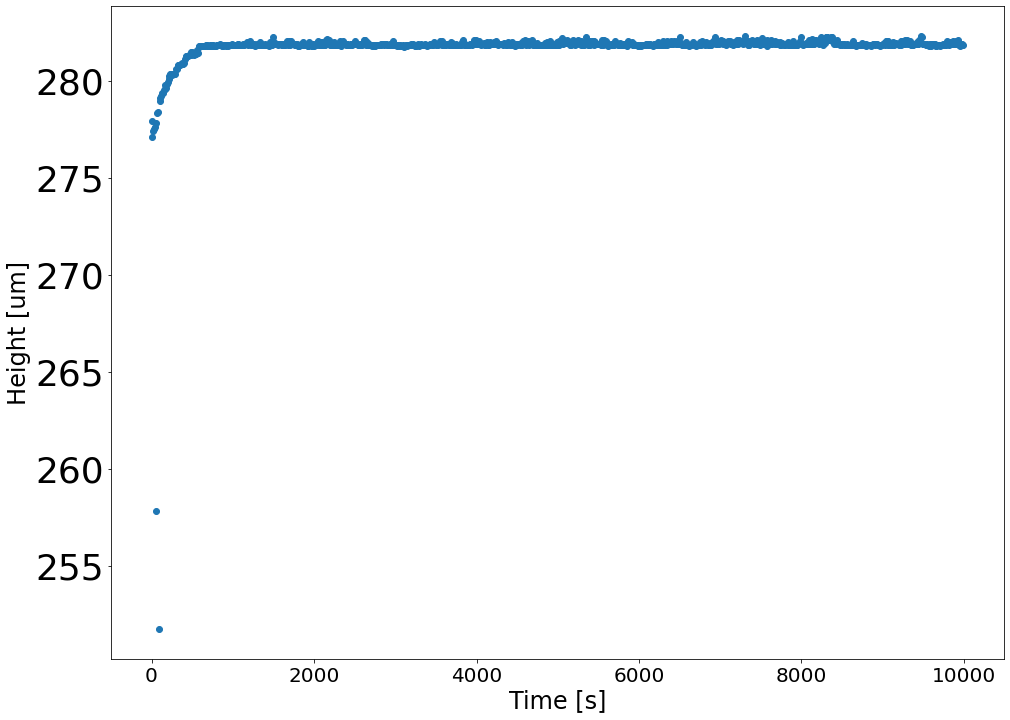

281.74653449700946 1.3122894254826796
281.8559363029698 0.23975271530554176
981


In [147]:
plt.plot(np.arange(0,len(height)*10,10),height,linestyle="",marker="o")
plt.xlabel("Time [s]")
plt.ylabel("Height [um]")
plt.show()
print(np.mean(height),np.std(height))
print(np.mean([x for x in height if np.abs(x-np.mean(height))<(factor_std*np.std(height))]),np.std([x for x in height if np.abs(x-np.mean(height))<factor_std*np.std(height)]))
print(len([x for x in height if np.abs(x-np.mean(height))<(factor_std*np.std(height))]))

In [148]:
df['ewm_20'] = df.mean_height.ewm(span=20, adjust=True).mean() # do the exponential weighted mean over 20 files
df['ewm_100'] = df.mean_height.ewm(span=100, adjust=True).mean() # do the exponential weighted mean over 100 files
df['ewm_500'] = df.mean_height.ewm(span=500, adjust=True).mean() # do the exponential weighted mean over 500 files


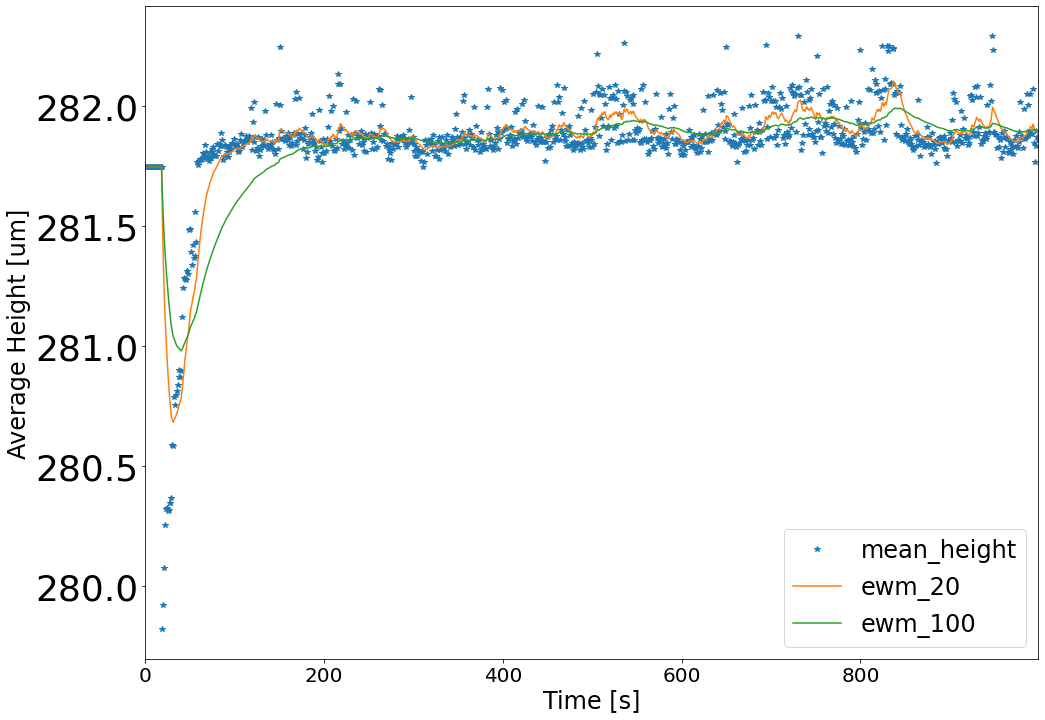

In [149]:
df.mean_height.plot(marker="*",linestyle="")#), label = "height-filtered data")
df.ewm_20.plot()#, label = "20 datasets EWM")
df.ewm_100.plot()#, label = "100 datasets EWM")
plt.xlabel("Time [s]")
plt.ylabel("Average Height [um]")
plt.legend()
plt.show()

In [10]:
# load the attractor mean position for the data file
data_filename = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
attr_pos = load_dir_reduced_to_attr_pos(dirname=data_filename,file_prefix=FOI,max_files=10000)


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]


In [11]:
# load the time frame from all the data sets in 100er chunks to not flood the memory (could be parallelized)
t = load_dir_reduced_to_time(dirname=data_filename,file_prefix=FOI,max_files=10000)



100%|██████████| 100/100 [00:22<00:00,  4.49it/s]


In [12]:
df["Time_Epoch"] = t # store the time
df["Attr_Pos_V"] = attr_pos # save raw position

del t # free some memory, otherwise bunnies die
del attr_pos # free more memory


------------------------------------------------------------------
| FCN = 2.381E-13               |      Ncalls=35 (35 total)      |
| EDM = 2.38E-13 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.09904999993134567 -0.00499999621661118


/home/analysis_user/New_trap_code/Tools/AnaUtil.py:100: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  print_level=1)
/home/analysis_user/New_trap_code/Tools/AnaUtil.py:100: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  print_level=1)


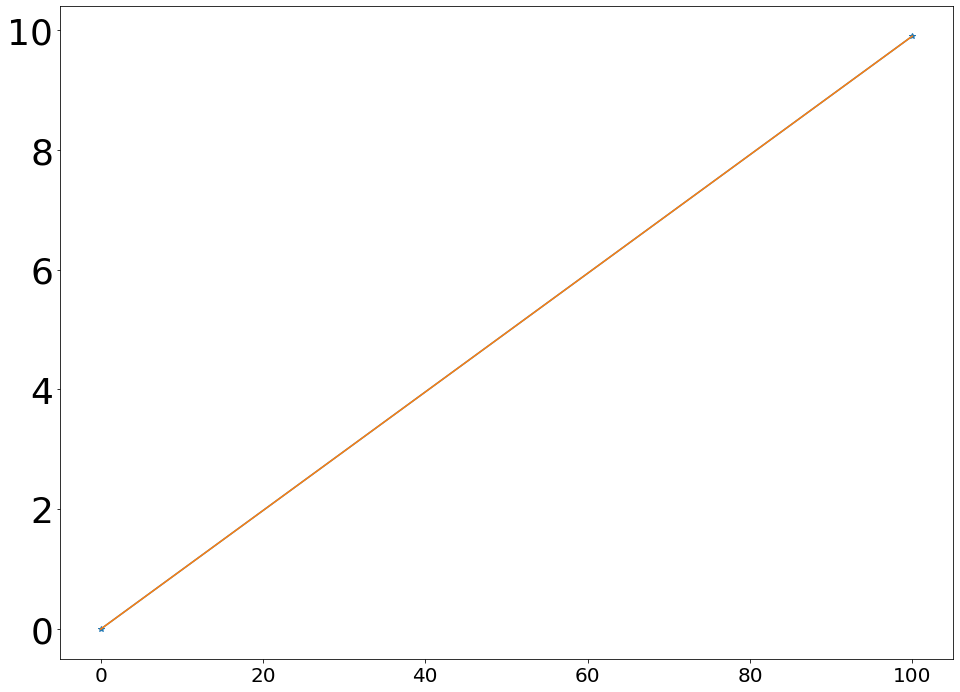

In [13]:
# save three values
## height_cal is the position of the bead in Aerotech coordinates
## z_distance transforms the cant_pos[2] voltage directly into um (using the vanilla calibration)
## z_distance_emp uses Akio's empirical data
df["height_cal"] = df['ewm_100'].apply(lambda element: element-attractor_0)
df["z_distance"] = df['height_cal'] - voltage_to_z_position(df['Attr_Pos_V'])
df["z_distance_emp"] = df['height_cal'] - voltage_to_z_position(df['Attr_Pos_V'],redo=True)


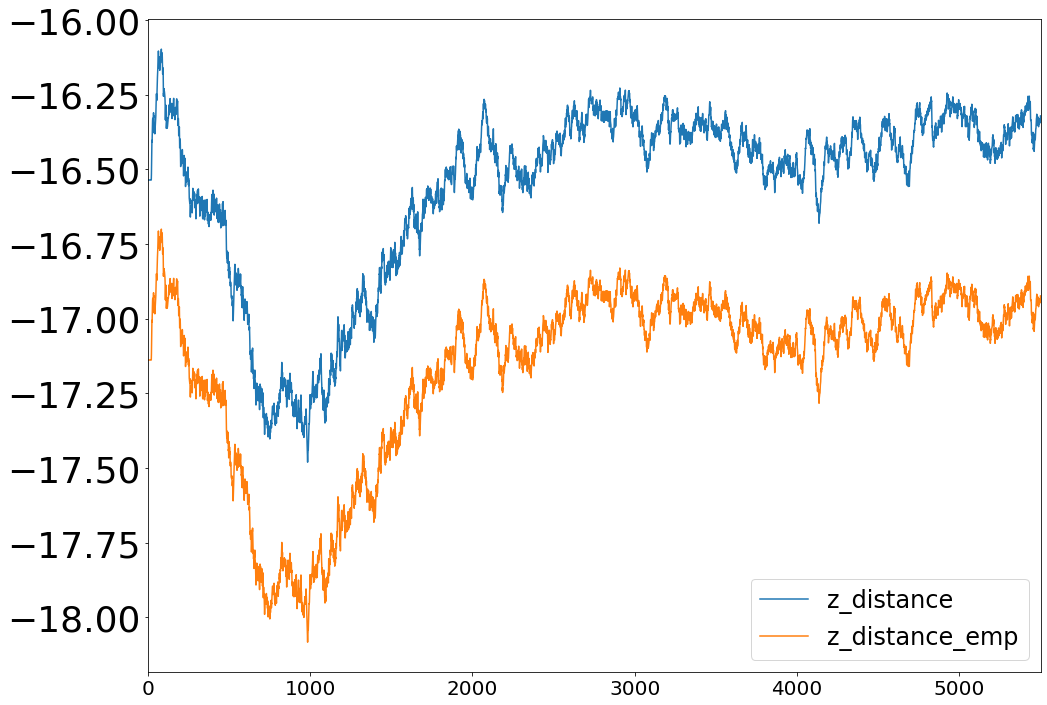

In [14]:
df.z_distance.plot()
df.z_distance_emp.plot()
plt.legend()

In [15]:
# assume for same year and same month, it can have multiple days. get those
dt.datetime.fromtimestamp(df["Time_Epoch"][0])
year = dt.datetime.fromtimestamp(df["Time_Epoch"][0]).year
month = dt.datetime.fromtimestamp(df["Time_Epoch"][0]).month
#months = []
#months = set(months)
days = []
days = set(days)
for i in range(len(df)):
    days.add(dt.datetime.fromtimestamp(df["Time_Epoch"][i]).day)
    #months.add(dt.datetime.fromtimestamp(df["Time_Epoch"][i]).month)
print(days)

{26, 27}


In [16]:
# prepare the files to match the time stamp to extract the environmental data
fn = []
for day in days:
    env_file = "/data/new_trap_processed/processed_files/{0}/Bead{1}/EnvData/{2}{3}{4}/environmental_data_{2}{3}{4}.pkl".format(bead_date,bead_number,year,str(month).zfill(2),str(day).zfill(2))
    fn.append(env_file)
print(fn)
    

['/data/new_trap_processed/processed_files/20200320/Bead1/EnvData/20200326/environmental_data_20200326.pkl', '/data/new_trap_processed/processed_files/20200320/Bead1/EnvData/20200327/environmental_data_20200327.pkl']


In [17]:
df_new = match_environmental_data(df,fn) # match the environmental data

100%|██████████| 5500/5500 [01:04<00:00, 85.75it/s] 


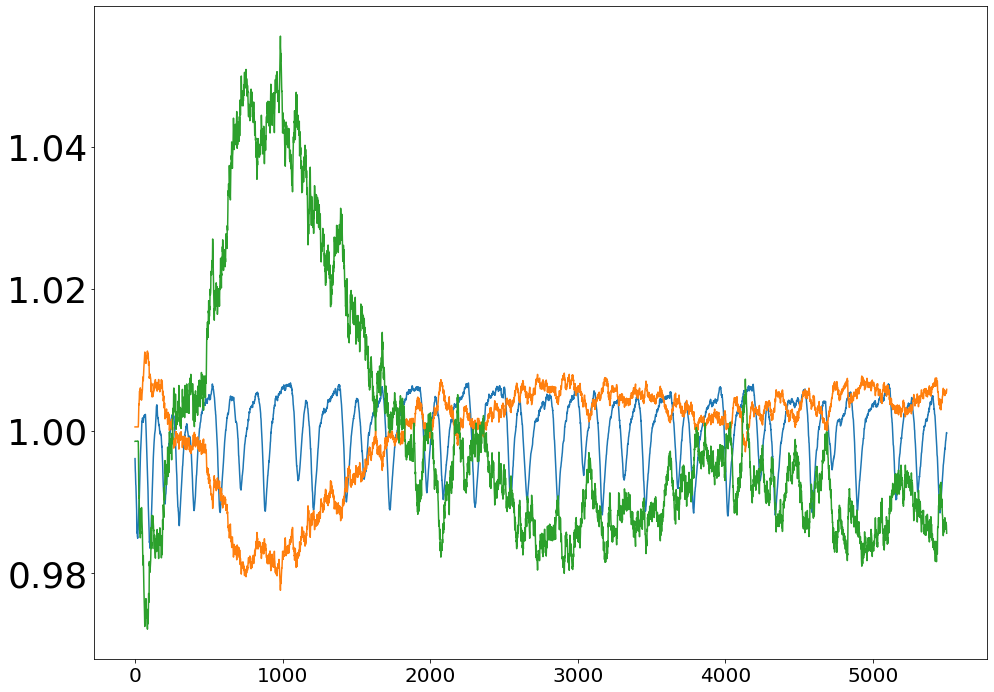

In [18]:
plt.plot(df_new.AirTemperature/df_new.AirTemperature.mean())
plt.plot(df_new.height_cal/df_new.height_cal.mean())
plt.plot(df_new.z_distance/df_new.z_distance.mean())
#plt.plot(df_new.z_distance_emp/df_new.z_distance_emp.mean())
#plt.xlim(0,1000)
plt.show()

In [19]:
# save the file
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number

try:
    os.makedirs(base_proc+dataset)
    print("Created subdirs %s" %dataset)
except:
    print("Folder exists or you do not have permissions")
    
outputname = base_proc + dataset+FOI+"_aux.pkl"
if(os.path.isfile(outputname)==False):
    df.to_pickle(outputname)
    print("Successfully saved auxiliary file")
else:print("No auxiliary file produced. %s exists already!" %outputname)    

Created subdirs /Shaking/Shaking373/
Successfully saved auxiliary file


In [20]:
del data # free the data